# Text

### RNN (Recurrent Neural Network)

In [ ]:
# IMDB Review Data Set Loading
# tensorflow keras에는 이미 정수로 바꾼 Review 데이터가 포함되어 있음
# 가장 많이 등장하는 단어 500개만 vocabulary로 사용해서 데이터 적재
# X에는 댓글, t에는 긍정 or 부정
from tensorflow.keras.datasets import imdb

(x_data_train, t_data_train), (x_data_test, t_data_test) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 0s 0us/step


(25000,)
(25000,)
(25000,)
(25000,)
[1 0 0 1 0 0 1 0 1 0]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
<class 'numpy.ndarray'>
<class 'list'>
218
189
[218 189 141 550 147  43 123 562 233 130]
238.

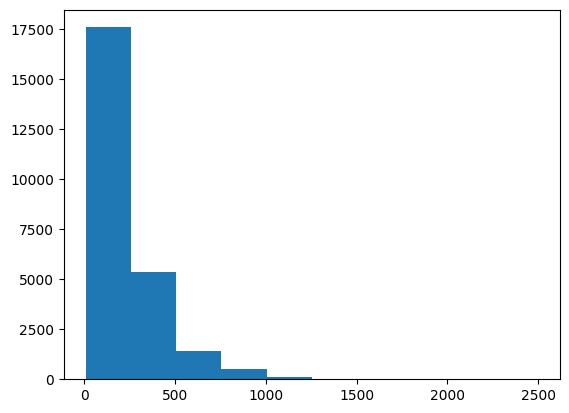

<class 'numpy.ndarray'>
(25000, 100)


In [ ]:
# 데이터 구성 확인
print(x_data_train.shape)
print(t_data_train.shape)

print(x_data_test.shape)
print(t_data_test.shape)

# train_data: 25,000, test_data: 25,000
# t_data_train
print(t_data_train[:10])  # [1 0 0 1 0 0 1 0 1 0]
print(x_data_train[0])  # 1차원 ndarray에 python list가 들어가 있음
                        # 2차원 ndarray가 아닌 이유는
                        # 리뷰마다 길이가 다른데 ndarray는 크기가 고정되어 있어서 공간의 낭비 생김
                        # ndarray 안에 python list를 사용하면 공간 낭비 없음

print(type(x_data_train))  # <class 'numpy.ndarray'>
print(type(x_data_train[0]))  # <class 'list'>

print(len(x_data_train[0]))  # 첫 번째 리뷰 길이: 218
print(len(x_data_train[1]))  # 두 번째 리뷰 길이: 189

# padding
import numpy as np
import matplotlib.pyplot as plt

lengths = np.array([len(x) for x in x_data_train])
print(lengths[:10])
#

# 모든 Review의 평균길이와 중간값을 출력
print(np.mean(lengths))
print(np.median(lengths))

plt.hist(lengths)
plt.show()

# 대부분의 review는 길이가 300 token 미만
# 실제로는 100 token 미만이 대다수일 것

# 모든 리뷰 길이를 100으로 맞추기
# 100 token 이상의 리뷰는 앞쪽 데이터를 잘라서
# 100 token 미만의 리뷰는 앞쪽에 패딩 붙이기
# keras 함수를 이용하여 확인

from tensorflow.keras.preprocessing.sequence import pad_sequences

x_data_train_seq = pad_sequences(x_data_train, maxlen=100)
print(type(x_data_train_seq))  # <class 'numpy.ndarray'>
print(x_data_train_seq.shape)  # (25000, 100)

# 25,000 개의 review, 각 review는 100개의 token(time step)으로 재단